In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
car_price = pd.read_csv('CarPrice.csv')

In [3]:
car_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
car_price['enginesize'].isna().sum()

0

In [5]:
car_price['price'].isna().sum()

0

In [24]:
car_price['wheelbase'].isna().sum()

0

In [25]:
X = car_price[['enginesize', 'wheelbase']]
y = car_price[['price']]

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # random state makes it reproducable

In [28]:
X_train

,enginesize,wheelbase
66,134,104.9
111,120,107.9
153,92,95.7
96,97,94.5
38,110,96.5
...,...,...
106,181,99.2
14,164,103.5
92,97,94.5
179,171,102.9


In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lr = LinearRegression()

In [33]:
lr.fit(X_train, y_train) # y = a1 * x1 + a2 * x2 + b

LinearRegression()

In [36]:
lr.coef_ # this is a1 and a2

array([[155.18264252, 150.09366241]])

In [37]:
lr.intercept_ # this is b

array([-21212.48829052])

In [38]:
y_pred = lr.predict(X_test)

In [39]:
y_pred

array([[26755.37805558],
       [14050.75728945],
       [11998.53279819],
       [12438.89339929],
       [23696.23815576],
       [ 8024.07913174],
       [10221.56587938],
       [ 8359.37416915],
       [10106.32235548],
       [ 8444.34138649],
       [14961.75479821],
       [ 8179.26177426],
       [16257.90684914],
       [13089.38512777],
       [44730.08939093],
       [ 7428.27831404],
       [ 1521.93266034],
       [17389.98616774],
       [12173.81378706],
       [10136.34108796],
       [12549.04794309],
       [21944.97371157],
       [ 8114.13532919],
       [ 6062.42598609],
       [ 6817.72570418],
       [26755.37805558],
       [16213.39389858],
       [16323.03329421],
       [ 8024.07913174],
       [16323.03329421],
       [23696.23815576],
       [ 6817.72570418],
       [ 7428.27831404],
       [22009.3274344 ],
       [ 7954.12128064],
       [23200.9290698 ],
       [10106.32235548],
       [ 3954.22271366],
       [ 6937.80063411],
       [17389.98616774],


In [40]:
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
type(y_pred), type(y_test.values)

(numpy.ndarray, numpy.ndarray)

In [42]:
mse = mean_squared_error(y_test, y_pred)

In [43]:
mse

14875296.161788356

In [44]:
r_score = r2_score(y_pred, y_test)

ValueError: x and y must be the same size

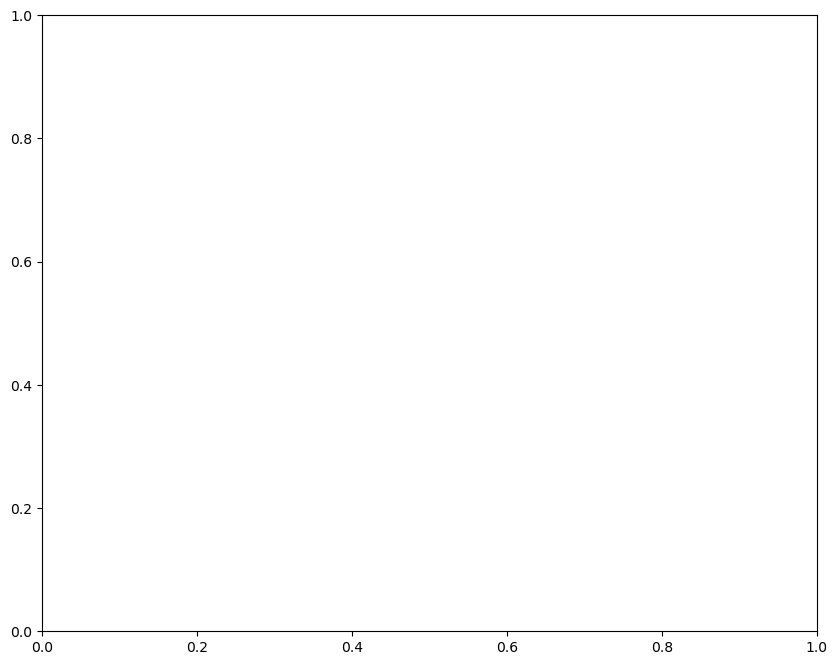

In [45]:
plt.figure(figsize=(10, 8))
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r', )
# plt.scatter(y_test.values, y_pred)
# plt.title('Inputs vs. Outputs')
# plt.xlabel('Inputs')
# plt.ylabel('Outputs')
plt.show()

In [23]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x: 'float | ArrayLike', y: 'float | ArrayLike', s: 'float | ArrayLike | None' = None, c: 'ArrayLike | Sequence[ColorType] | ColorType | None' = None, marker: 'MarkerType | None' = None, cmap: 'str | Colormap | None' = None, norm: 'str | Normalize | None' = None, vmin: 'float | None' = None, vmax: 'float | None' = None, alpha: 'float | None' = None, linewidths: 'float | Sequence[float] | None' = None, *, edgecolors: "Literal['face', 'none'] | ColorType | Sequence[ColorType] | None" = None, plotnonfinite: 'bool' = False, data=None, **kwargs) -> 'PathCollection'
    A scatter plot of *y* vs. *x* with varying marker size and/or color.

    Parameters
    ----------
    x, y : float or array-like, shape (n, )
        The data positions.

    s : float or array-like, shape (n, ), optional
        The marker size in points**2 (typographic points are 1/72 in.).
        Default is ``rcParams['lines.markersize'] ** 2``.

        The 